# PROBLEM STATEMENT


- In this project, I will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**


*Note: the purpose of this project is to familiarize with TensorFlow 2.0. This is intended to be the simplest model possible; one neuron (i.e. one weight and one bias).*



<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Thermometer_CF.svg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Convert Celsius to Fahrenheit [Image Source: https://commons.wikimedia.org/wiki/File:Thermometer_CF.svg]
  </td></tr>
</table>


# IMPORT LIBRARIES

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 332.1MB 94kB/s 
     |████████████████████████████████| 419kB 39.7MB/s 
     |████████████████████████████████| 3.0MB 31.0MB/s 


# IMPORT DATASETS

In [0]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You have to include the full link to the csv file containing your dataset
Temperature_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Celsius-to-Fahrenheit.csv')
Temperature_df.reset_index(drop=True, inplace=True)



In [0]:
Temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [0]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [0]:
Temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [0]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [0]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# VISUALIZE DATASET

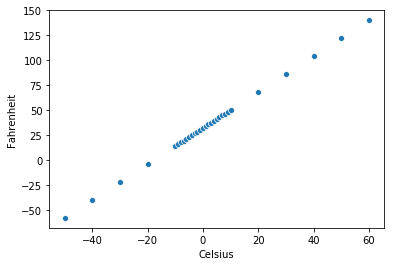

In [0]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

# CREATE TESTING AND TRAINING DATASET

For sake of simplicity, we will use all of the data for training.

*(note: we should not do this, the testing data should never be seen during training; this is only done for familiarizing with Tensorflow 2.0)*

In [0]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']


# BUILD AND TRAIN THE MODEL

In [0]:
X_train.shape

(30,)

In [0]:
y_train.shape

(30,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1])) #only two parameters to train/tune


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error') #0.5 here is the learning rate; the loss is what we're trying to optimize to

In [0]:
epochs_hist = model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
30/30 [==============================] - 1s 27ms/sample - loss: 2807.2424
Epoch 2/200
30/30 [==============================] - 0s 245us/sample - loss: 1947.6292
Epoch 3/200
30/30 [==============================] - 0s 221us/sample - loss: 1352.1532
Epoch 4/200
30/30 [==============================] - 0s 151us/sample - loss: 1011.4805
Epoch 5/200
30/30 [==============================] - 0s 234us/sample - loss: 893.2841
Epoch 6/200
30/30 [==============================] - 0s 219us/sample - loss: 933.5174
Epoch 7/200
30/30 [==============================] - 0s 205us/sample - loss: 1043.1376
Epoch 8/200
30/30 [==============================] - 0s 185us/sample - loss: 1137.9169
Epoch 9/200
30/30 [==============================] - 0s 196us/sample - loss: 1169.0588
Epoch 10/200
30/30 [==============================] - 0s 184us/sample - loss: 1128.3590
Epoch 11/200
30/30 [==============================] - 0s 123us/sample - loss: 1033.7722
Epoch 12/200
30/30 [========================

# EVALUATING THE MODEL 

In [0]:
epochs_hist.history.keys()

dict_keys(['loss'])

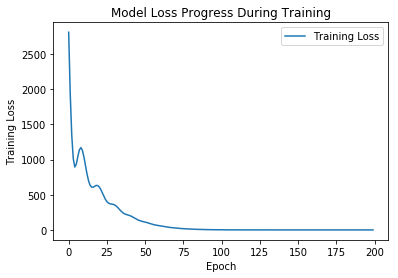

In [0]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [0]:
model.get_weights()

[array([[1.7999835]], dtype=float32), array([32.003017], dtype=float32)]

In [0]:
# Use the trained model to perform predictions

Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


Temperature in degF Using Trained ANN = [[32.003017]]


In [0]:
# Let's confirm this Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0


# MY FIRST NEURAL NETWORK MODEL USING TENSORFLOW 2.0 IN GOOGLE COLAB! 